In [97]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from sklearn.metrics import mean_squared_log_error, mean_squared_error

from pmdarima.arima import auto_arima

In [98]:
app_dir = '/Users/paramshah/Documents/Param/NYU/courses/Machine Learning/Project/Github Team/covid-19'

In [124]:
df = pd.read_csv(os.path.join(app_dir, 'data/staging/jhu_cases.csv'))
df['date'] = pd.to_datetime(df['date'])

In [125]:
countries = df.country.unique()

In [126]:
countries

array(['United States', 'India', 'Italy', 'Canada', 'Spain', 'France',
       'United Kingdom', 'Iraq', 'Japan', 'Germany', 'Brazil'],
      dtype=object)

In [127]:
df.date.values.max()

numpy.datetime64('2020-05-14T00:00:00.000000000')

In [128]:
df[df.country == 'Spain']

,country,date,cases
456,Spain,2020-01-22,0
457,Spain,2020-01-23,0
458,Spain,2020-01-24,0
459,Spain,2020-01-25,0
460,Spain,2020-01-26,0
...,...,...,...
565,Spain,2020-05-10,224350
566,Spain,2020-05-11,227436
567,Spain,2020-05-12,228030
568,Spain,2020-05-13,228691


In [129]:
df[df.country == 'United States'].sort_values(by=['date'])

,country,date,cases
0,United States,2020-01-22,1
1,United States,2020-01-23,1
2,United States,2020-01-24,2
3,United States,2020-01-25,2
4,United States,2020-01-26,5
...,...,...,...
109,United States,2020-05-10,1329260
110,United States,2020-05-11,1347881
111,United States,2020-05-12,1369376
112,United States,2020-05-13,1390406


In [130]:
for country in countries:
    subset = df[df.country == country]
    
    cases = subset.sort_values(by=['date'])['cases'].dropna().values
    model = auto_arima(cases, start_p=0, start_q=0,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=12, max_q=12, # maximum p and q
                          m=1,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, with_intercept=False,
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    print(model.summary())

Fit ARIMA: order=(0, 2, 0); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0); AIC=2049.552, BIC=2054.989, Fit time=0.010 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2049.602, BIC=2055.039, Fit time=0.017 seconds
Fit ARIMA: order=(2, 2, 0); AIC=2051.528, BIC=2059.683, Fit time=0.021 seconds
Fit ARIMA: order=(1, 2, 1); AIC=2052.912, BIC=2061.068, Fit time=0.030 seconds
Fit ARIMA: order=(2, 2, 1); AIC=2050.934, BIC=2061.808, Fit time=0.038 seconds
Total fit time: 0.128 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  112
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1022.776
Method:                       css-mle   S.D. of innovations           2237.094
Date:                Sun, 17 May 2020   AIC                           2049.552
Time:                        17:21:34   BIC                           2054.989
Sample:                           

Fit ARIMA: order=(0, 1, 1); AIC=600.510, BIC=605.964, Fit time=0.010 seconds
Fit ARIMA: order=(2, 1, 0); AIC=592.948, BIC=601.131, Fit time=0.019 seconds
Fit ARIMA: order=(2, 1, 1); AIC=574.772, BIC=585.682, Fit time=0.097 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=575.277, BIC=583.459, Fit time=0.058 seconds
Fit ARIMA: order=(3, 1, 1); AIC=576.500, BIC=590.136, Fit time=0.119 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.334 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  113
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -283.386
Method:                       css-mle   S.D. of innovations              2.952
Date:                Sun, 17 May 2020   AIC                            574.772
Time:                        17:21:39   BIC             

Fit ARIMA: order=(1, 2, 3); AIC=1462.216, BIC=1475.808, Fit time=0.064 seconds
Fit ARIMA: order=(2, 2, 4); AIC=1453.719, BIC=1472.748, Fit time=0.143 seconds
Fit ARIMA: order=(1, 2, 4); AIC=1454.936, BIC=1471.247, Fit time=0.119 seconds
Fit ARIMA: order=(3, 2, 4); AIC=1453.507, BIC=1475.255, Fit time=0.206 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1451.525, BIC=1470.555, Fit time=0.239 seconds
Fit ARIMA: order=(4, 2, 4); AIC=1452.565, BIC=1477.032, Fit time=0.340 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 3); AIC=1453.501, BIC=1475.249, Fit time=0.176 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1454.111, BIC=1470.422, Fit time=0.128 seconds
Total fit time: 1.585 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  112
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -718.763
Method:                       css-

In [144]:
subset = df[df.country == 'Brazil']
    
cases = subset.sort_values(by=['date'])['cases'].dropna().values
model = auto_arima(cases, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, with_intercept=False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Fit ARIMA: order=(0, 2, 0); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0); AIC=1831.922, BIC=1837.359, Fit time=0.009 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1832.124, BIC=1837.561, Fit time=0.011 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1829.827, BIC=1837.982, Fit time=0.031 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1828.978, BIC=1839.852, Fit time=0.048 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1815.301, BIC=1831.612, Fit time=0.260 seconds
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=1817.230, BIC=1836.259, Fit time=0.293 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1808.400, BIC=1821.992, Fit time=0.045 seconds
Fit ARIMA: order=(4, 2, 1); AIC=1799.385, BIC=1815.696, Fit time=0.079 seconds
Fit ARIMA: order=(4, 2, 0); AIC=1797.721, BIC=1811.314, Fit time=0.048 seconds
Fit ARIMA: order=(5, 2, 1); AIC=1800.054, BIC=1819.083, Fit time=0.143 seconds
Fit ARIMA: order=(3, 2, 0); AIC=1817.917, BIC=1828.791, Fit time=0.028 secon

In [145]:
subset

,country,date,cases
1140,Brazil,2020-01-22,0
1141,Brazil,2020-01-23,0
1142,Brazil,2020-01-24,0
1143,Brazil,2020-01-25,0
1144,Brazil,2020-01-26,0
...,...,...,...
1249,Brazil,2020-05-10,162699
1250,Brazil,2020-05-11,169594
1251,Brazil,2020-05-12,178214
1252,Brazil,2020-05-13,190137


In [117]:
from datetime import datetime
# Forecast cases
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True,alpha=0.2)
# make series for plotting purpose
fc = pd.DataFrame(fc,columns = ['Prediction'])

lower_series = pd.DataFrame(confint[:, 0],columns = ['Linf'])
upper_series = pd.DataFrame(confint[:, 1],columns = ['Lsup'])

try_df = pd.DataFrame({'date': pd.date_range(start='2020-05-15', end='2020-05-24')})
date = try_df['date']

fc=pd.concat([fc,lower_series,upper_series,date],axis=1)
fc.set_index([ 'date'], inplace=True)

train = subset.copy()
train.set_index(['date'], inplace=True)
train=train.dropna()

In [118]:
subset[subset['date'] == '2020-03-26']

,country,date,deaths
748,United Kingdom,2020-03-26,0


In [119]:
fc

,Prediction,Linf,Lsup
date,,,
2020-05-15,9.037776,8.671391,9.404161
2020-05-16,9.286634,8.750247,9.823022
2020-05-17,9.524820,8.838255,10.211386
2020-05-18,9.624162,8.750634,10.497689
2020-05-19,9.820619,8.795231,10.846007
2020-05-20,9.893811,8.694976,11.092645
2020-05-21,10.027796,8.675557,11.380036
2020-05-22,10.091124,8.578439,11.603808
2020-05-23,10.179951,8.517677,11.842224


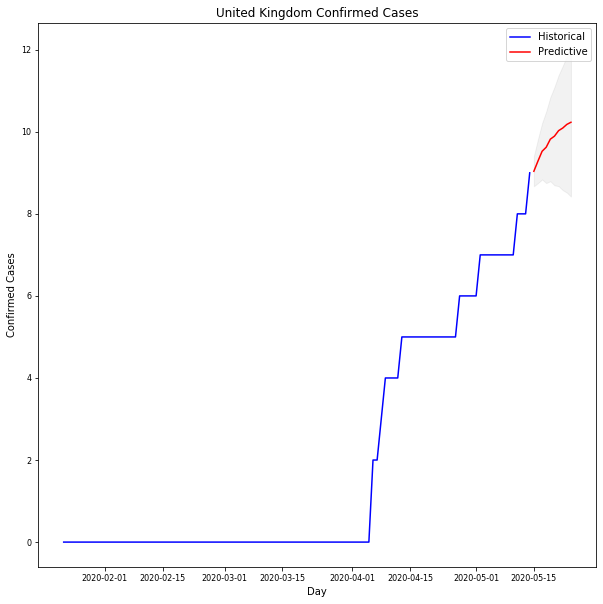

In [121]:
# Plot
plt.figure(figsize=(10,10))

plt.title('United Kingdom Confirmed Cases')
plt.plot(train.deaths,label='Historical',color='blue')
plt.plot(fc.Prediction,label='Predictive',color='red')
plt.fill_between(fc.index, 
                 fc.Linf, 
                 fc.Lsup, 
                 color='k', alpha=.05)
plt.xlabel('Day',fontsize=10)
plt.ylabel('Confirmed Cases',fontsize=10)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
# plt.yscale('log')
plt.legend()


plt.show()

In [43]:
try_df

,date
0,2020-05-14
1,2020-05-15
2,2020-05-16
3,2020-05-17
4,2020-05-18
5,2020-05-19
6,2020-05-20
7,2020-05-21
8,2020-05-22
9,2020-05-23
